# Granularity vs utility function
- In this file we will look at how does final utility change when the granularity of summands increases. 
- Idea of this implementation comes from my example of three barels, cca 50 50 and 50 or 150 at once? 
- In my example I want to have utility function (something like log) and compare first utility of 100 in total and then adding in steps. utility of 25 is something, utility of 50 is equivalent to 45 -> utility of 70 is 65 -> utility of 90 is 85. Utility of 100 is 86, difference is 1. 


## Choosing the correct utility function
- I want something like logarithm but maybe that is too harsh 

In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [127]:
list(range(1,100))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [128]:
plt.plot(my_util(list(range(1,100))))

TypeError: can only concatenate list (not "int") to list

In [129]:
np.log(15)

2.70805020110221

In [130]:
(np.log(2)+np.log(100))/2

2.6491586832740186

In [131]:
2*np.log(2)

1.3862943611198906

In [132]:
np.log(15)

2.70805020110221

In [133]:
def my_util(x,a=40): 
    y = np.log(x+a)-np.log(a)
    return(y)

In [134]:
def my_util_inv(y,a=40): 
    x = np.exp(y+np.log(a))-a
    return(x)

In [135]:
vmy_util = np.vectorize(my_util)

In [136]:
np.log(45)-np.log(40)

0.11778303565638337

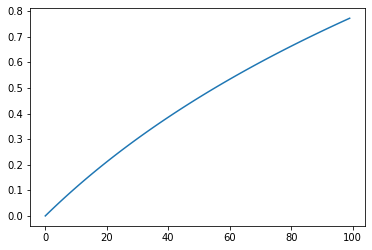

In [137]:
plt.plot(vmy_util(list(range(0,100)),85))

### Okay now I am happy with my function 
- Utility of coinflip for 100 is the same as sure for 40 
- For 70 it is 30, makese sense to me
- with parameter a = 85
- for larger numbers starts to fail 1000 -> 235. 

- Maybe a variable like 600 is more reasonable if it is me and dollars. Otherwise anything is reasonable... 


In [138]:
(my_util(100,600)+my_util(0,34))/2 - my_util(48, 600)

0.00011429877750090967

In [139]:
my_util(100, 40) 

1.2527629684953676

In [140]:
_sum = 0 
for i in range(1,101): 
    money_sum = my_util_inv(_sum)
    _sum = my_util(1+money_sum)
print(_sum)
    

1.252762968495365


# Conclusion
- If I was smarter I could have seen it faster. 
- Maybe with discounting it will get different results, but this is clearly not a problem... 

# Expected utility of 3 barel example

50 USD to either 60 or 41,666 -> 180 and 125 with 50/50 results in 150.5 USD equivalent... OK 

In [211]:
(my_util(180)+my_util(125))/2-my_util(150.6)

-0.00039048109363015726

Horizon

In [205]:
50*1.0626

53.13

In [195]:
my_util(41.666)*0.125+my_util(47.054)*0.375+my_util(53.13)*0.375+my_util(60)*0.125-my_util(50.13)

-8.021113686962345e-05

Results in 50.13 equivalent. Barrel 2 is value of the barrel plus 50.11  

44.28/50/56.45

In [203]:
my_util(44.283+50.13)*0.25+my_util(50+50.13)*0.5+my_util(56.456+50.13)*0.25-my_util(100.25)

-8.903676601557109e-06

47.05/53.13

In [208]:
my_util(47.0544+100.25)*0.5+my_util(53.13+100.25)*0.5-my_util(150.3)

9.435867490781291e-05

The difference is there, in the same way that it would be in the following example 

In [219]:
my_util(180)*0.125+my_util(155)*0.375+my_util(150)*0.375+my_util(125)*0.125-my_util(153)

-0.005234699851680569

Less uncertainty -> more utility, because of risk aversion. 
Each action maximizes the expected utility and the differences are not very large, so ok. 